In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from operator import add
import os
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator
import matplotlib.font_manager


sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=14,
        )
    
def autolabel_h(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(
            "%.2f" % width,
            xy=(width, rect.get_y() + rect.get_height() / 2),
            xytext=(18, -1),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="center",
            size=13,
        )

SAVEPATH = './figs'
os.makedirs(SAVEPATH, exist_ok=True)

# Motiv: deep GNNs better

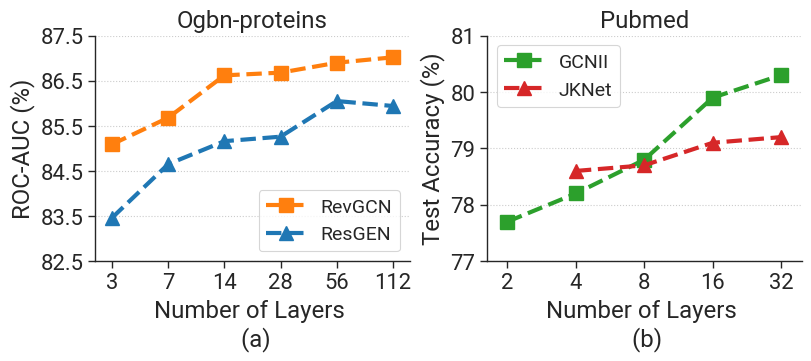

In [2]:

import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.5))

### Fig 1 ###
resgen = np.array([83.46, 84.65, 85.16, 85.26, 86.05, 85.94])
revgcn = np.array([85.09, 85.68, 86.62, 86.68, 86.9, 87.02])
x = np.array([1, 2, 3, 4, 5, 6])

p2, = axs[0].plot(x, revgcn, label='RevGCN',marker='s',color=cmp[1],linestyle='--',linewidth=3,ms=10)
p1, = axs[0].plot(x, resgen, label='ResGEN',marker='^',color=cmp[0],linestyle='--',linewidth=3,ms=10)


axs[0].set_xlabel(f"Number of Layers \n (a)")
axs[0].set_ylabel(f"ROC-AUC (%)")
axs[0].set_ylim(82.5, 87.5)
axs[0].set_yticks(np.arange(82.5, 87.6, 1))
axs[0].set_xlim(0.7,6.3)
axs[0].set_xticks(x)
axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
axs[0].grid(axis="y", linestyle=":")
axs[0].set_title('Ogbn-proteins')
axs[0].legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=14,
              shadow=False)




### Fig 2 ###
jknet = np.array([78.6, 78.7, 79.1, 79.2])
gcnii = np.array([77.7, 78.2, 78.8, 79.9, 80.3])
x1 = np.array([2, 3, 4, 5])
x2 = np.array([1, 2, 3, 4, 5])

p2, = axs[1].plot(x2, gcnii, label='GCNII',marker='s',color=cmp[2],linestyle='--',linewidth=3,ms=10)
p1, = axs[1].plot(x1, jknet, label='JKNet',marker='^',color=cmp[3],linestyle='--',linewidth=3,ms=10)


axs[1].set_xlabel(f"Number of Layers \n (b)")
axs[1].set_ylabel(f"Test Accuracy (%)")
axs[1].set_ylim(77, 81)
# axs[1].set_yticks(np.arange(8, 87.6, 1))
axs[1].set_xlim(0.7,5.3)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(['2', '4', '8', '16', '32'])
axs[1].grid(axis="y", linestyle=":")
axs[1].set_title('Pubmed')
axs[1].legend(
              loc=0, 
              # ncol=2,
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=14,
              shadow=False)


sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-deep-gnns.pdf", bbox_inches="tight")

# Motiv: LM4Graph time profile

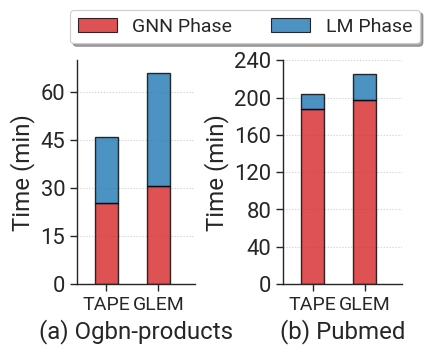

In [3]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(4, 3))

# revgat
labels = ['TAPE', 'GLEM']

# pubmed:products:arxiv
# lm_part_tape = [957.887, 1242.23, 7770.7]
# gnn_part_tape = [11266.503, 1519.35, 30771.6]
# lm_part_glem = [1695.054, 2118.927, 13520.1]
# gnn_part_glem = [11855.476, 1843.413, 33404.14]

# products:pubmed
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

#### Fig 1 ####
width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
A = axs[0].bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = axs[0].bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

# p2 = axs.bar(x-width/2-0.06, lm_part_tape, width=width, label='lm', alpha=0.9, linewidth=1, edgecolor="k", color = [cmp[0]])
# p1 = axs.bar(x-width/2-0.06, gnn_part_tape, width=width, bottom=lm_part_tape, label='gnn', alpha=0.9, linewidth=1, edgecolor="k", color = [cmp[3]])
# p4 = axs.bar(x+width/2+0.06, lm_part_glem, width=width, label='glem', hatch="/o", alpha=0.9, linewidth=1, edgecolor="k", color = [cmp[0]])
# p3 = axs.bar(x+width/2+0.06, gnn_part_glem, width=width, bottom=lm_part_glem, label='glem', hatch="/o",  alpha=0.9, linewidth=1, edgecolor="k", color = [cmp[3]])

axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].set_xlim(-0.4, 1.2)
# axs[0].set_yscale("log", base=10)
axs[0].set_ylabel('Time (min)')
axs[0].set_ylim(0, 70)
axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[0].grid(axis="y", linestyle=":")
axs[0].set_xlabel('(a) Ogbn-products')

#### Fig 2 ####
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = axs[1].bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = axs[1].bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].set_xlim(-0.4, 1.2)
# axs[0].set_yscale("log", base=10)
axs[1].set_ylabel('Time (min)')
axs[1].set_ylim(0, 240)
axs[1].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[1].grid(axis="y", linestyle=":")
axs[1].set_xlabel('(b) Pubmed')


A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(1.06, 1.16),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

sns.despine()
save=False
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-time.pdf", bbox_inches="tight")

# Motiv: LM4Graph memory profile

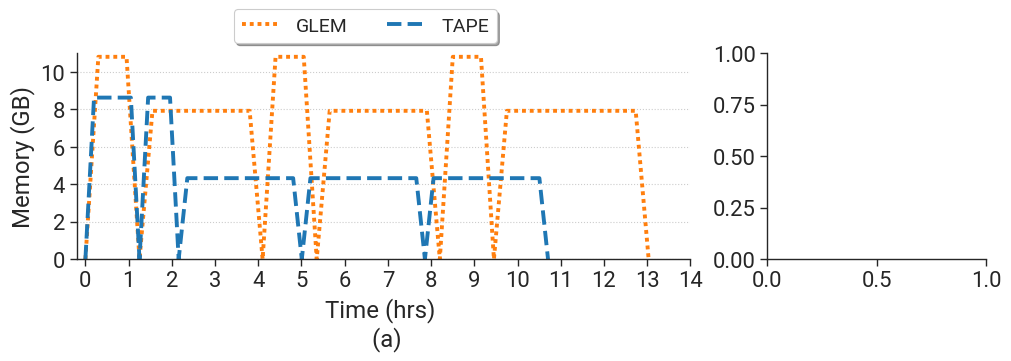

In [4]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[2.8, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(10, 3.5))

### Fig 1 ###
warmup = 0.2
x_tape = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, 7770.7/3600-warmup, 7770.7/3600,
    warmup+7770.7/3600, (10257.2+7770.7)/3600-warmup, (10257.2+7770.7)/3600,
    warmup+(10257.2+7770.7)/3600, (10257.2*2+7770.7)/3600-warmup, (10257.2*2+7770.7)/3600,
    warmup+(10257.2*2+7770.7)/3600, (10257.2*3+7770.7)/3600-warmup, (10257.2*3+7770.7)/3600,
    ])
memory_tape = np.array([
    0, 8834, 8834, 0, 
    8834, 8834, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    ]) / 1024

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024


p2, = axs[0].plot(x_glem, memory_glem, label='GLEM',
                #   marker='o',
                  color=cmp[1],
                  linestyle=(0, (1, 1)),
                  linewidth=2.8,
                  ms=6,
                  )
p1, = axs[0].plot(x_tape, memory_tape, label='TAPE',
                #   marker='s',
                  color=cmp[0],
                  linestyle='--',
                  linewidth=2.8,
                  ms=6,
                  )



axs[0].set_xlabel(f"Time (hrs) \n (a)")
axs[0].set_xlim(-0.2,14)
axs[0].set_xticks(np.arange(0, 15, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
axs[0].set_ylabel(f"Memory (GB)")
axs[0].set_ylim(0, 11)
axs[0].set_yticks(np.arange(0, 11, 2))

axs[0].grid(axis="y", linestyle=":")
# axs[0].set_title('Ogbn-arxiv')
axs[0].legend(
            loc=1, 
            bbox_to_anchor=(0.7, 1.26),
            ncol=3,
            frameon=True,
            fancybox=True,
            shadow=True,
            fontsize=14,
            )
sns.despine()


save=True
if save:
    fig.savefig(f"{SAVEPATH}/test.pdf", bbox_inches="tight")

# Motiv: 3 in 1

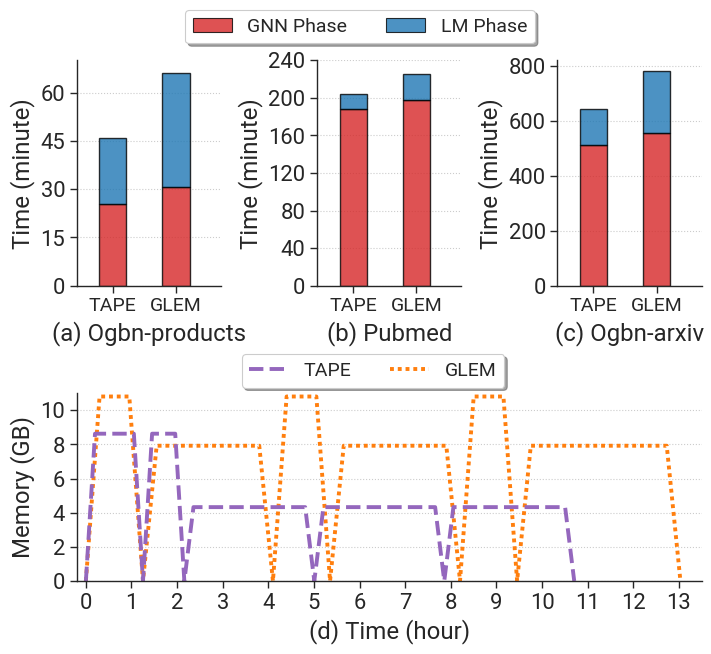

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


# fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(8, 7))
fig = plt.figure(figsize=(7, 6), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1.2, 1])  # 定义 2x2 网格

# 创建上排两个子图
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# 合并下排3个子图为一个子图
ax4 = fig.add_subplot(gs[1, :])  # 占据整行

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
# revgat
labels = ['TAPE', 'GLEM']
# products:pubmed
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
# Fig 1
A = ax1.bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax1.bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_xlim(-0.4, 1.2)
# ax1.set_yscale("log", base=10)
ax1.set_ylabel('Time (minute)')
ax1.set_ylim(0, 70)
ax1.set_yticks(y_ticks)
# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
ax1.set_xlabel('(a) Ogbn-products')

#### #### #### #### #### #### #### #### Fig 2 ####  #### #### #### #### #### #### ####
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = ax2.bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax2.bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax2.set_ylabel('Time (minute)')
ax2.set_ylim(0, 240)
ax2.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax2.grid(axis="y", linestyle=":")
ax2.set_xlabel('(b) Pubmed')

#### #### #### #### #### #### #### #### Fig 3 ####  #### #### #### #### #### #### ####

lm_part_arxiv = np.array([7770.7, 13520.1]) / 60
gnn_part_arxiv = np.array([30771.6, 33404.14]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
# y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
ax3.bar(x_ticks, gnn_part_arxiv, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
ax3.bar(x_ticks, lm_part_arxiv, width=width, bottom=gnn_part_arxiv, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax3.set_ylabel('Time (minute)')
# ax3.set_ylim(0, 240)
# ax3.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax3.grid(axis="y", linestyle=":")
ax3.set_xlabel('(c) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(0.77, 1.08),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

#### #### #### #### #### #### #### #### Fig 4 ####  #### #### #### #### #### #### ####
warmup = 0.2
x_tape = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, 7770.7/3600-warmup, 7770.7/3600,
    warmup+7770.7/3600, (10257.2+7770.7)/3600-warmup, (10257.2+7770.7)/3600,
    warmup+(10257.2+7770.7)/3600, (10257.2*2+7770.7)/3600-warmup, (10257.2*2+7770.7)/3600,
    warmup+(10257.2*2+7770.7)/3600, (10257.2*3+7770.7)/3600-warmup, (10257.2*3+7770.7)/3600,
    ])
memory_tape = np.array([
    0, 8834, 8834, 0, 
    8834, 8834, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    ]) / 1024

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024


p2, = ax4.plot(x_glem, memory_glem, label='GLEM',
                #   marker='o',
                  color=cmp[1],
                  linestyle=(0, (1, 1)),
                  linewidth=2.8,
                  ms=6,
                  )
p1, = ax4.plot(x_tape, memory_tape, label='TAPE',
                #   marker='s',
                  color=cmp[4],
                  linestyle='--',
                  linewidth=2.8,
                  ms=6,
                  )



ax4.set_xlabel(f"(d) Time (hour)")
ax4.set_xlim(-0.2,13.5)
ax4.set_xticks(np.arange(0, 14, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Memory (GB)")
ax4.set_ylim(0, 11)
ax4.set_yticks(np.arange(0, 11, 2))

ax4.grid(axis="y", linestyle=":")
# axs[0].set_title('Ogbn-arxiv')
ax4.legend(
            loc=1, 
            handles=[p1, p2],
            bbox_to_anchor=(0.7, 1.26),
            ncol=3,
            frameon=True,
            fancybox=True,
            shadow=True,
            fontsize=14,
            )

sns.despine()


save=False
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-time.pdf", bbox_inches="tight")

# Motiv: 3 in 2 v2

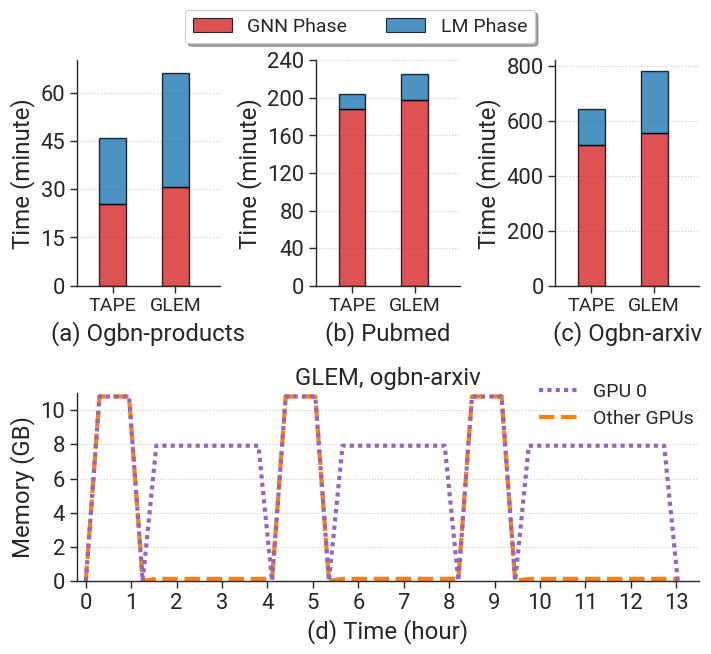

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


# fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(8, 7))
fig = plt.figure(figsize=(7, 6), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1.2, 1], hspace=0.07)  # 定义 2x2 网格

# 创建上排两个子图
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# 合并下排3个子图为一个子图
ax4 = fig.add_subplot(gs[1, :])  # 占据整行

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
labels = ['TAPE', 'GLEM']
# products, revgat
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
A = ax1.bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax1.bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_xlim(-0.4, 1.2)
# ax1.set_yscale("log", base=10)
ax1.set_ylabel('Time (minute)')
ax1.set_ylim(0, 70)
ax1.set_yticks(y_ticks)
# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
ax1.set_xlabel('(a) Ogbn-products')

#### #### #### #### #### #### #### #### Fig 2 ####  #### #### #### #### #### #### ####
# pubmed, revgat
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = ax2.bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax2.bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax2.set_ylabel('Time (minute)')
ax2.set_ylim(0, 240)
ax2.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax2.grid(axis="y", linestyle=":")
ax2.set_xlabel('(b) Pubmed')

#### #### #### #### #### #### #### #### Fig 3 ####  #### #### #### #### #### #### ####
# revgat
lm_part_arxiv = np.array([7770.7, 13520.1]) / 60
gnn_part_arxiv = np.array([30771.6, 33404.14]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
# y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
ax3.bar(x_ticks, gnn_part_arxiv, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
ax3.bar(x_ticks, lm_part_arxiv, width=width, bottom=gnn_part_arxiv, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax3.set_ylabel('Time (minute)')
# ax3.set_ylim(0, 240)
# ax3.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax3.grid(axis="y", linestyle=":")
ax3.set_xlabel('(c) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(0.77, 1.08),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

#### #### #### #### #### #### #### #### Fig 4 ####  #### #### #### #### #### #### ####
# warmup = 0.2
# x_tape = np.array([
#     0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
#     warmup+4506.7/3600, 7770.7/3600-warmup, 7770.7/3600,
#     warmup+7770.7/3600, (10257.2+7770.7)/3600-warmup, (10257.2+7770.7)/3600,
#     warmup+(10257.2+7770.7)/3600, (10257.2*2+7770.7)/3600-warmup, (10257.2*2+7770.7)/3600,
#     warmup+(10257.2*2+7770.7)/3600, (10257.2*3+7770.7)/3600-warmup, (10257.2*3+7770.7)/3600,
#     ])
# memory_tape = np.array([
#     0, 8834, 8834, 0, 
#     8834, 8834, 0,
#     4430, 4430, 0,
#     4430, 4430, 0,
#     4430, 4430, 0,
#     ]) / 1024

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024

memory_glem_other_gpu = np.array([
    0, 11064, 11064, 0, 
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    ]) / 1024


p1, = ax4.plot(x_glem, memory_glem_other_gpu, label='Other GPUs',
                #   marker='s',
                  color=cmp[1],
                  linestyle='--',
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )
p2, = ax4.plot(x_glem, memory_glem, label='GPU 0',
                #   marker='o',
                  color=cmp[4],
                  linestyle=(0, (1, 1)),
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )




ax4.set_xlabel(f"(d) Time (hour)")
ax4.set_xlim(-0.2,13.5)
ax4.set_xticks(np.arange(0, 14, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Memory (GB)")
ax4.set_ylim(0, 11)
ax4.set_yticks(np.arange(0, 11, 2))

ax4.grid(axis="y", linestyle=":")
ax4.set_title('GLEM, ogbn-arxiv')
ax4.legend(
            loc=1, 
            handles=[p2, p1],
            bbox_to_anchor=(1.02, 1.15),
            ncol=1,
            frameon=False,
            fancybox=False,
            shadow=False,
            fontsize=14,
            )

sns.despine()


save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-profile.pdf", bbox_inches="tight")

# E2E: speed and accuracy

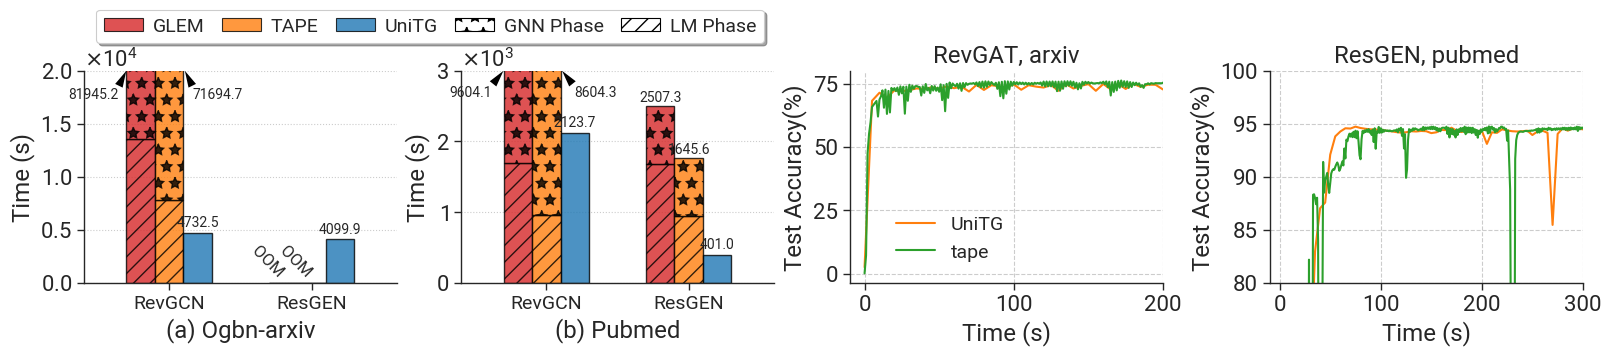

In [29]:

import numpy as np
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=10,
        )

grid_params=dict(width_ratios=[1, 1, 1, 1])
fig, axs = plt.subplots(ncols=4, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(16, 3.1))

# -------------------------------------- fig 1 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([13520.1, 0]) # 81945.19
gnn_part_glem = np.array([68425.09, 0])
lm_part_tape = np.array([7770.7, 0]) # 71694.7
gnn_part_tape = np.array([63924, 0])
lm_part_my = np.array([4732.49, 4099.88])
gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[0].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[0].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[0].bar(x_ticks+width, lm_part_my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[0].annotate(
    "OOM",
    xy=(2-width-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "OOM",
    xy=(2-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "81945.2",
    xy=(0.7, 20000),
    xytext=(-24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[0].annotate(
    "71694.7",
    xy=(1.11, 20000),
    xytext=(24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
autolabel(A, axs[0])

axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylabel('Time (s)')
axs[0].set_ylim(0, 20000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[0].grid(axis="y", linestyle=":")
axs[0].set_xlabel('(a) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GLEM")
B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="TAPE")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="UniTG")
D =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='*', label="GNN Phase")
E =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='//', label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, B, C, D, E],
    bbox_to_anchor=(0.48, 1.13),
    ncol=5,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
    # handlelength=1.0,
    handletextpad=0.5,
    columnspacing=0.9,
)

# -------------------------------------- fig 2 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([1695.054, 1685.054]) # 81945.19
gnn_part_glem = np.array([7909.056, 822.246])
lm_part_tape = np.array([957.887, 950.19]) # 71694.7
gnn_part_tape = np.array([7646.4, 695.447])
my = np.array([2123.67, 401.04])
# gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[1].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[1].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[1].bar(x_ticks+width, my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[1].annotate(
    "9604.1",
    xy=(0.7, 3000),
    xytext=(-24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "8604.3",
    xy=(1.11, 3000),
    xytext=(24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "2507.3",
    xy=(1.8, 2507.3),
    xytext=(0, 1),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
axs[1].annotate(
    "1645.6",
    xy=(2, 1645.637),
    xytext=(0, 7),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
autolabel(A, axs[1])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_ylabel('Time (s)')
axs[1].set_ylim(0, 3000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[1].grid(axis="y", linestyle=":")
axs[1].set_xlabel('(b) Pubmed')


###### Fig 3 ######
my_arxiv_revgat = np.load('./exps/ogbn-arxiv/revgat_pp_test_acc_20layers_1b_2mb.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps/ogbn-arxiv/20RevGAT+TA_derberta-base_test_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

axs[2].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[1], linewidth=1.5)
axs[2].plot(x2, tape_arxiv_revgat * 100, label='tape', color=cmp[2], linewidth=1.5)

axs[2].set_xlabel(f"Time (s)")
axs[2].set_xlim(-10, 200)
axs[2].set_ylabel(f"Test Accuracy(%)")
# axs[3].set_xticks(np.arange(0, 1001, 250))
axs[2].tick_params(labelsize=16)
axs[2].grid(linestyle='--')
axs[2].title.set_text('RevGAT, arxiv')

# axs[2].set_ylim(20, 75)
# axs[2].set_yticks(np.arange(20, 75, 15))
# axs[2].set_xscale("log")

axs[2].legend(
            loc='upper center', 
              bbox_to_anchor=(0.32,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


###### Fig 4 ######
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps/pubmed/112ResGNN+E_derberta-base_val_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

axs[3].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[1], linewidth=1.5)
axs[3].plot(x2, tape_arxiv_revgat * 100, label='tape', color=cmp[2], linewidth=1.5)

axs[3].set_xlabel(f"Time (s)")
axs[3].set_xlim(-10, 300)
axs[3].set_ylabel(f"Test Accuracy(%)")
axs[3].set_ylim(80, 100)
# axs[3].set_yticks(np.arange(50, 101, 10))
axs[3].tick_params(labelsize=16)
axs[3].grid(linestyle='--')
axs[3].title.set_text('ResGEN, pubmed')

handles,labels=plt.gca().get_legend_handles_labels()
# axs[3].legend(
#             loc='upper center', 
#               bbox_to_anchor=(0.32,1.08), 
#               frameon=False,
#               fancybox=True,
#               shadow=False,
#               fontsize=14)


sns.despine()

save=False
if save:
    fig.savefig(f"{SAVEPATH}/end2end_converge.pdf", bbox_inches="tight")

# E2E speed

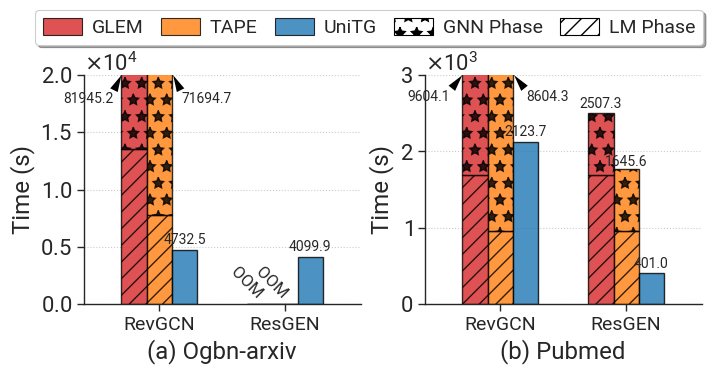

In [39]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=10,
        )

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7, 3.2))

# -------------------------------------- fig 1 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([13520.1, 0]) # 81945.19
gnn_part_glem = np.array([68425.09, 0])
lm_part_tape = np.array([7770.7, 0]) # 71694.7
gnn_part_tape = np.array([63924, 0])
lm_part_my = np.array([4732.49, 4099.88])
gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[0].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[0].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[0].bar(x_ticks+width, lm_part_my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[0].annotate(
    "OOM",
    xy=(2-width-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "OOM",
    xy=(2-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "81945.2",
    xy=(0.7, 20000),
    xytext=(-24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[0].annotate(
    "71694.7",
    xy=(1.11, 20000),
    xytext=(24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
autolabel(A, axs[0])

axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylabel('Time (s)')
axs[0].set_ylim(0, 20000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[0].grid(axis="y", linestyle=":")
axs[0].set_xlabel('(a) Ogbn-arxiv')

# -------------------------------------- fig 2 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([1695.054, 1685.054]) # 81945.19
gnn_part_glem = np.array([7909.056, 822.246])
lm_part_tape = np.array([957.887, 950.19]) # 71694.7
gnn_part_tape = np.array([7646.4, 695.447])
my = np.array([2123.67, 401.04])
# gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[1].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[1].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[1].bar(x_ticks+width, my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[1].annotate(
    "9604.1",
    xy=(0.7, 3000),
    xytext=(-24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "8604.3",
    xy=(1.11, 3000),
    xytext=(24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "2507.3",
    xy=(1.8, 2507.3),
    xytext=(0, 1),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
axs[1].annotate(
    "1645.6",
    xy=(2, 1645.637),
    xytext=(0, 7),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
autolabel(A, axs[1])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_ylabel('Time (s)')
axs[1].set_ylim(0, 3000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[1].grid(axis="y", linestyle=":")
axs[1].set_xlabel('(b) Pubmed')

sns.despine()

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GLEM")
B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="TAPE")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="UniTG")
D =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='*', label="GNN Phase")
E =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='//', label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, B, C, D, E],
    bbox_to_anchor=(1.01, 1.15),
    ncol=5,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
    # handlelength=1.0,
    handletextpad=0.5,
    columnspacing=0.9,
    handleheight=1,
)

save=True
if save:
    fig.savefig(f"{SAVEPATH}/e2e_timebar.pdf", bbox_inches="tight")

# E2E: accuracy

In [106]:
# test = pd.read_csv('./my_arxiv_revgat.csv')
# np.save('/home/mzhang/work/TiGraph/exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy', test['0'].values)
# max(test['0'].values)


tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/112RevGCN+TA_derberta-base_test_acc.npy')
max(tape_arxiv_revgat)

0.7538423554101599

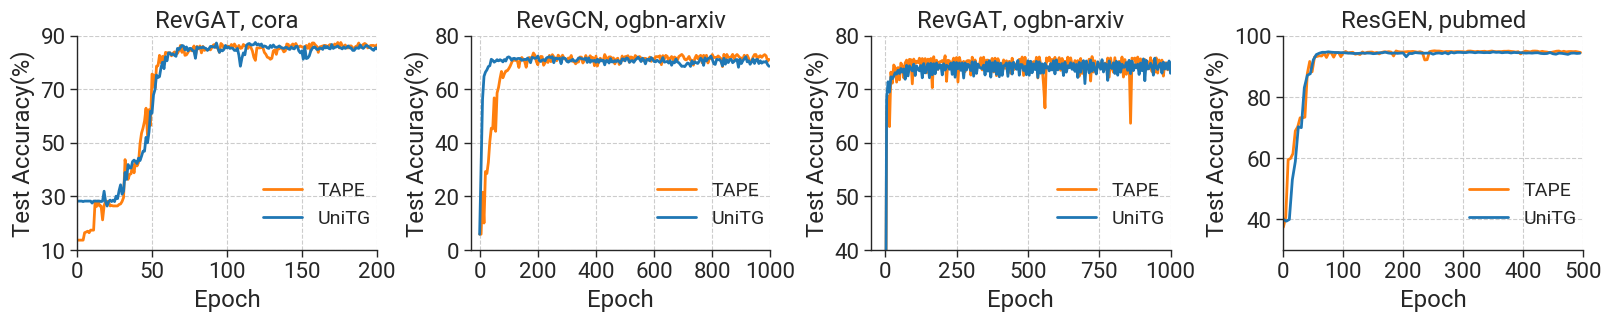

In [67]:

import numpy as np
from scipy.signal import savgol_filter
from matplotlib.ticker import ScalarFormatter


formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

grid_params=dict(width_ratios=[1, 1, 1, 1])
fig, axs = plt.subplots(ncols=4, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(16, 3.1))

# -------------------------------------- fig 1 -------------------------------------- 
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/cora/40RevGAT+TA_derberta-base_test_acc.npy') 

# my_arxiv_revgat = test['0'].values


x1 = np.arange(len(my_arxiv_revgat))  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

# sample_step = 4
# tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
# x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
axs[0].plot(x2, tape_arxiv_revgat, label='TAPE', color=cmp[1], linewidth=2)
axs[0].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[0].set_xlabel(f"Epoch")
axs[0].set_xlim(0, 200)
axs[0].set_xticks(np.arange(0, 201, 50))

axs[0].set_ylabel(f"Test Accuracy(%)")
axs[0].set_ylim(10, 90)
axs[0].set_yticks(np.arange(10, 91, 20))
# axs[2].set_xscale("log")

axs[0].tick_params(labelsize=16)
axs[0].grid(linestyle='--')
axs[0].title.set_text('RevGAT, cora')

axs[0].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)

# -------------------------------------- fig 2 -------------------------------------- 
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/112revgnn_4pp_1b_4mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/112RevGCN+TA_derberta-base_test_acc.npy') * 100

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

tape_arxiv_revgat[200:300] -= 1
tape_arxiv_revgat[300:] -= 2
my_arxiv_revgat[100:150] += 1
my_arxiv_revgat[150:200] += 2

sample_step = 5
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step


axs[1].plot(x2_sampled, tape_arxiv_revgat_sampled, label='TAPE', color=cmp[1], linewidth=2)
axs[1].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[1].set_xlabel(f"Epoch")
axs[1].set_xlim(-30, 1000)
axs[1].set_xticks(np.arange(0, 1001, 200))

axs[1].set_ylim(0, 80)
axs[1].set_yticks(np.arange(0, 81, 20))
axs[1].set_ylabel(f"Test Accuracy(%)")
axs[1].tick_params(labelsize=16)
axs[1].grid(linestyle='--')
axs[1].title.set_text('RevGCN, ogbn-arxiv')

axs[1].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)

# -------------------------------------- fig 3 -------------------------------------- 
my_arxiv_revgat = np.load('./exps/ogbn-arxiv/revgat_pp_test_acc_20layers_1b_2mb.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/20RevGAT+TA_derberta-base_test_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

sample_step = 5
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
# my_arxiv_revgat_sampled = my_arxiv_revgat[::2]
# x1_sampled = np.arange(len(my_arxiv_revgat_sampled)) * 10

axs[2].plot(x2_sampled, tape_arxiv_revgat_sampled * 100, label='TAPE', color=cmp[1], linewidth=2)
axs[2].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[2].set_xlabel(f"Epoch")
axs[2].set_xlim(-50, 1000)
axs[2].set_xticks(np.arange(0, 1001, 250))

axs[2].set_ylabel(f"Test Accuracy(%)")
axs[2].tick_params(labelsize=16)
axs[2].grid(linestyle='--')
axs[2].title.set_text('RevGAT, ogbn-arxiv')

axs[2].set_ylim(40, 80)
axs[2].set_yticks(np.arange(40, 81, 10))
# axs[2].set_xscale("log")

axs[2].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


###### Fig 4 ######
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/pubmed/112ResGNN+TA_derberta-base_val_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

sample_step = 4
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
 
axs[3].plot(x2_sampled, tape_arxiv_revgat_sampled * 100, label='TAPE', color=cmp[1], linewidth=2)
axs[3].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[3].set_xlabel(f"Epoch")
axs[3].set_xlim(0, 500)
axs[3].set_xticks(np.arange(0, 501, 100))
axs[3].set_ylabel(f"Test Accuracy(%)")
axs[3].set_ylim(30, 100)
axs[3].set_yticks(np.arange(40, 101, 20))
axs[3].tick_params(labelsize=16)
axs[3].grid(linestyle='--')
axs[3].title.set_text('ResGEN, pubmed')

handles,labels=plt.gca().get_legend_handles_labels()
axs[3].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/e2e_converge.pdf", bbox_inches="tight")

In [50]:
test = pd.read_csv('./tape_arxiv_revgat.csv')
np.save('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy', test['0'].values)
# max(test['0'].values)


# tape_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
# tape_arxiv_revgat

# Sysname cora 

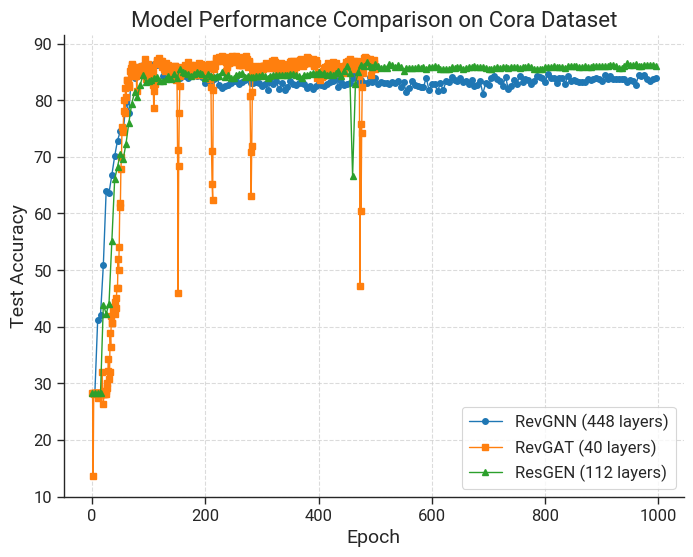

In [3]:
cmp = sns.color_palette("tab10")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

revgnn_test_acc = np.load('./exps/cora/448revgnn_4pp_1b_1mb_deberta-base_test_acc.npy')
revgat_test_acc = np.load('./exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy')
resgen_test_acc = np.load('./exps/cora/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')


x_revgnn = np.arange(len(revgnn_test_acc)) * 5  # Scale by 5 epochs
x_revgat = np.arange(len(revgat_test_acc)) * 1  # No scaling
x_resgen = np.arange(len(resgen_test_acc)) * 5  # Scale by 5 epochs

ax.plot(x_revgnn, revgnn_test_acc, label='RevGNN (448 layers)', 
        marker='o', color=cmp[0], linewidth=1, markersize=4)
ax.plot(x_revgat, revgat_test_acc, label='RevGAT (40 layers)', 
        marker='s', color=cmp[1], linewidth=1, markersize=4)
ax.plot(x_resgen, resgen_test_acc, label='ResGEN (112 layers)', 
        marker='^', color=cmp[2], linewidth=1, markersize=4)


# Customize plot
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Test Accuracy', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(linestyle='--', alpha=0.7)
ax.set_title('Model Performance Comparison on Cora Dataset', fontsize=16)

# axs.set_ylim(50, 75)
# axs.set_xlim(0, 1000)


# handles,labels=plt.gca().get_legend_handles_labels()
ax.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

## Products

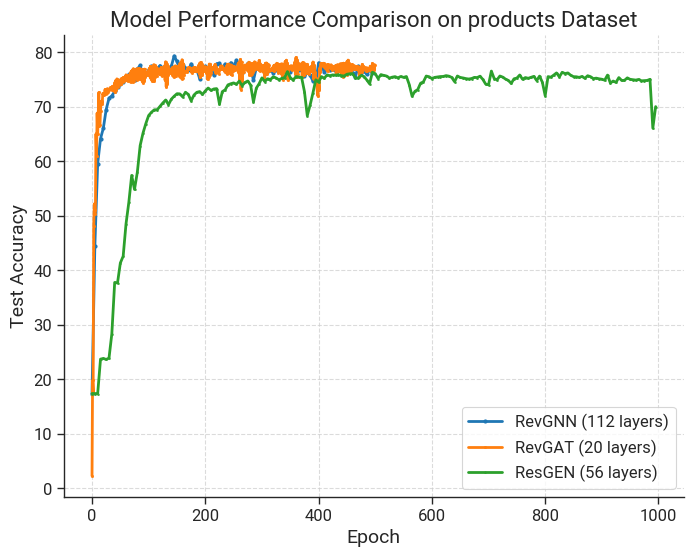

In [4]:
cmp = sns.color_palette("tab10")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

revgnn_test_acc = np.load('./exps/ogbn-products/112revgnn_4pp_1b_1mb_deberta-base_test_acc.npy')
revgat_test_acc = np.load('./exps/ogbn-products/20revgat_4pp_1b_1mb_deberta-base_test_acc.npy')
resgen_test_acc = np.load('./exps/ogbn-products/56resgen_4pp_1b_1mb_deberta-base_test_acc.npy')


x_revgnn = np.arange(len(revgnn_test_acc)) * 5  # Scale by 5 epochs
x_revgat = np.arange(len(revgat_test_acc)) * 1  # No scaling
x_resgen = np.arange(len(resgen_test_acc)) * 5  # Scale by 5 epochs

ax.plot(x_revgnn, revgnn_test_acc, label='RevGNN (112 layers)', 
        marker='o', color=cmp[0], linewidth=2, markersize=2)
ax.plot(x_revgat, revgat_test_acc, label='RevGAT (20 layers)', 
        marker='s', color=cmp[1], linewidth=2, markersize=1)
ax.plot(x_resgen, resgen_test_acc, label='ResGEN (56 layers)', 
        marker='^', color=cmp[2], linewidth=2, markersize=1)


# Customize plot
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Test Accuracy', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(linestyle='--', alpha=0.7)
ax.set_title('Model Performance Comparison on products Dataset', fontsize=16)

# axs.set_ylim(50, 75)
# ax.set_xlim(0, 500)


# handles,labels=plt.gca().get_legend_handles_labels()
ax.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

In [ ]:
print(len(revgnn_test_acc), len(revgat_test_acc), len(resgen_test_acc))

In [ ]:
import torch
import dgl
from ogb.nodeproppred import DglNodePropPredDataset, NodePropPredDataset
import random

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

dataset_dir = "/home/mzhang/data/"
ogb_dataset = DglNodePropPredDataset(name="ogbn-arxiv", root=dataset_dir)
g, data_y = ogb_dataset[0]
data_y = torch.as_tensor(data_y).squeeze(1)
split_idx = ogb_dataset.get_idx_split()
data_x = torch.as_tensor(g.ndata["feat"])
num_classes = ogb_dataset.num_classes

each_chunk_idx = torch.arange(100)
chunk_g = dgl.node_subgraph(g, each_chunk_idx)
a = g.nodes()
b = chunk_g.ndata['_ID']
print(b)

In [ ]:
import torch

valid_indices = torch.tensor([1, 2, 0, 1, 1])
valid_labels = torch.tensor([1, 1, 2, 1, 1])
correct = torch.sum(valid_indices == valid_labels)
valid_indices == valid_labels

In [ ]:
import torch
LM_emb_path = f"./lm_workloads/prt_lm/ogbn-arxiv2/microsoft/deberta-base-seed0.emb"
if os.path.exists(LM_emb_path):
    print(f"LM_emb_path: {LM_emb_path}")
    features = torch.from_numpy(np.array(
            np.memmap(LM_emb_path, mode='r',
                    dtype=np.float16,
                    shape=(169340, 128)))
    ).to(torch.float32)
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows

In [ ]:
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows